In [23]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
from scipy.misc import logsumexp
from scipy.cluster.hierarchy import linkage, dendrogram
import itertools as it
import zipfile,io
import pickle
import pandas as pd
import re
import sheet3 as imp
%matplotlib inline
results = {}
dataset=['banana','diabetis','flare-solar','image','ringnorm']
res = ['kernel','kernelparameter','regularization','cvloss','ypred']
for k in dataset:
    results[k] ={}
    for j in res:
        results[k][j]=0.


with open('filename.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('results.p', 'wb') as handle:
#    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [24]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.77109269],
         [-0.2448248 ],
         [-0.53843675],
         ..., 
         [ 1.04244162],
         [-0.60053262],
         [-0.16481672]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

In [3]:
unzip = zipfile.ZipFile("sheet3_datasets.zip", 'r')        
fl = unzip.namelist() 

In [4]:
fl

['sheet3_datasets/',
 'sheet3_datasets/.DS_Store',
 '__MACOSX/',
 '__MACOSX/sheet3_datasets/',
 '__MACOSX/sheet3_datasets/._.DS_Store',
 'sheet3_datasets/U04_banana-xtest.dat',
 'sheet3_datasets/U04_banana-xtrain.dat',
 'sheet3_datasets/U04_banana-ytest.dat',
 'sheet3_datasets/U04_banana-ytrain.dat',
 'sheet3_datasets/U04_diabetis-xtest.dat',
 'sheet3_datasets/U04_diabetis-xtrain.dat',
 'sheet3_datasets/U04_diabetis-ytest.dat',
 'sheet3_datasets/U04_diabetis-ytrain.dat',
 'sheet3_datasets/U04_flare-solar-xtest.dat',
 'sheet3_datasets/U04_flare-solar-xtrain.dat',
 'sheet3_datasets/U04_flare-solar-ytest.dat',
 'sheet3_datasets/U04_flare-solar-ytrain.dat',
 'sheet3_datasets/U04_image-xtest.dat',
 'sheet3_datasets/U04_image-xtrain.dat',
 'sheet3_datasets/U04_image-ytest.dat',
 'sheet3_datasets/U04_image-ytrain.dat',
 'sheet3_datasets/U04_ringnorm-xtest.dat',
 'sheet3_datasets/U04_ringnorm-xtrain.dat',
 'sheet3_datasets/U04_ringnorm-ytest.dat',
 'sheet3_datasets/U04_ringnorm-ytrain.dat']

In [5]:
bxte=np.array(pd.read_table(unzip.open(fl[5]),header=None,delim_whitespace=True))
bxtr=np.array(pd.read_table(unzip.open(fl[6]),header=None,delim_whitespace=True))
byte=np.array(pd.read_table(unzip.open(fl[7]),header=None,delim_whitespace=True))
bytr=np.array(pd.read_table(unzip.open(fl[8]),header=None,delim_whitespace=True))

dxte=np.array(pd.read_table(unzip.open(fl[9]),header=None,delim_whitespace=True))
dxtr=np.array(pd.read_table(unzip.open(fl[10]),header=None,delim_whitespace=True))
dyte=np.array(pd.read_table(unzip.open(fl[11]),header=None,delim_whitespace=True))
dytr=np.array(pd.read_table(unzip.open(fl[12]),header=None,delim_whitespace=True))

fxte=np.array(pd.read_table(unzip.open(fl[13]),header=None,delim_whitespace=True))
fxtr=np.array(pd.read_table(unzip.open(fl[14]),header=None,delim_whitespace=True))
fyte=np.array(pd.read_table(unzip.open(fl[15]),header=None,delim_whitespace=True))
fytr=np.array(pd.read_table(unzip.open(fl[16]),header=None,delim_whitespace=True))

ixte=np.array(pd.read_table(unzip.open(fl[17]),header=None,delim_whitespace=True))
ixtr=np.array(pd.read_table(unzip.open(fl[18]),header=None,delim_whitespace=True))
iyte=np.array(pd.read_table(unzip.open(fl[19]),header=None,delim_whitespace=True))
iytr=np.array(pd.read_table(unzip.open(fl[20]),header=None,delim_whitespace=True))

rxte=np.array(pd.read_table(unzip.open(fl[21]),header=None,delim_whitespace=True))
rxtr=np.array(pd.read_table(unzip.open(fl[22]),header=None,delim_whitespace=True))
ryte=np.array(pd.read_table(unzip.open(fl[23]),header=None,delim_whitespace=True))
rytr=np.array(pd.read_table(unzip.open(fl[24]),header=None,delim_whitespace=True))

In [6]:
print(bxte.shape)
print(bxtr.shape)
print(byte.shape)
print(bytr.shape)

print(dxte.shape)
print(dxtr.shape)
print(dyte.shape)
print(dytr.shape)

print(fxte.shape)
print(fxtr.shape)
print(fyte.shape)
print(fytr.shape)

print(ixte.shape)
print(ixtr.shape)
print(iyte.shape)
print(iytr.shape)

print(rxte.shape)
print(rxtr.shape)
print(ryte.shape)
print(rytr.shape)

(2, 4900)
(2, 400)
(1, 4900)
(1, 400)
(8, 300)
(8, 468)
(1, 300)
(1, 468)
(9, 400)
(9, 666)
(1, 400)
(1, 666)
(18, 1010)
(18, 1300)
(1, 1010)
(1, 1300)
(20, 7000)
(20, 400)
(1, 7000)
(1, 400)


In [7]:
params_gaus = { 'kernel': ['gaussian'], 'kernelparameter': np.logspace(-2,2,10), 'regularization': [0]}
params_pol = { 'kernel': ['polynomial'], 'kernelparameter': np.arange(1,10), 'regularization': [0]}
params_lin = { 'kernel': ['linear'], 'kernelparameter': [0], 'regularization': [0]}

In [8]:
def zerooneloss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    pred = np.array(y_pred[:,0])
    true = np.array(y_true[:,0])
    true[np.where(true==-1)]=0
    b = np.mean(pred)
    pred[np.where(pred>=b)] = 1
    pred[np.where(pred<b)] = 0
    right = (true == pred).astype(np.int64).sum()
    loss = (len(true)-right)/len(true)
    return loss

In [16]:
def roc_fun(y_true, y_pred, plot = False):
    assert(len(y_true) == len(y_pred))
    bins=100
    pred = np.array(y_pred[:,0])
    true = np.array(y_true[:,0])
    true[np.where(true==-1)]=0
    n=len(pred)
    thres = np.linspace(np.min(pred),np.max(pred),bins).reshape(bins,1)*np.ones((1 ,n))
    predbr = pred.reshape(1,n)*np.ones((bins ,1))
    prebl=(predbr>thres).astype(np.int64)
    comp = (prebl==true).astype(np.int64)
    tpr = (prebl*comp).sum(1)/true.sum()
    fpr = (((comp-prebl))==(-np.ones(comp.shape))).sum(1)/(n-true.sum())
    idx=np.argsort(fpr)
    roc = np.append(fpr.reshape(1,len(fpr)),tpr.reshape(1,len(tpr)),0)
    D = np.linalg.norm(roc - np.array([[0],[1]]),axis=0)
    minidx=np.argmin(D)
    loss=(n-comp[minidx].sum())/n
    ROC = roc[:,idx]
    
    if(plot==True):
        fpdif = ROC[0,1:]-ROC[0,:-1]
        lower = fpdif*ROC[1,:-1]
        upper = fpdif*ROC[1,1:]
        AUC = (lower.sum()+upper.sum())/2
        print("AUC = ",AUC)
        plt.plot(ROC[0],ROC[1])
        plt.title("ROC curve")
        plt.xlabel("FP")
        plt.ylabel("TP")
    return loss 

In [10]:
def lincv(X, y, method, parameters,nfolds=10, nrepetitions=5,loss_function=roc_fun):
    n=len(X)
    d = len(X[0])
    e = n % nfolds
    div = n-e
    nom = int(div/nfolds)
    knl = parameters['kernel']
    reg = parameters['regularization']
    losssum =np.zeros(len(reg)*len(kp))
    krrset = [method(knl,0,reg[j])]
    for i in range(nrepetitions):
        partidx=np.append((np.ones((nfolds,nom))*np.arange(nom)).reshape(div),np.arange(e))
        np.random.shuffle(partidx)
        for j in range(nfolds):
            [krrset[a].fit(X[np.where(partidx!=j)],y[np.where(partidx!=j)]) for a in range(len(krrset))]
            yy = [krrset[a].predict(X[np.where(partidx!=j)]) for a in range(len(krrset))]
            loss = [loss_function(y[np.where(partidx!=j)].reshape(len(y[np.where(partidx!=j)]),1), np.array(yy[a])) for a in range(len(yy)) ]
            losssum = losssum +np.array(loss)
    D = (losssum -losssum.mean())**2
    return krrset[np.argmin(D)]

## Banann Gaus

In [19]:
bkrr = imp.cv(bxtr.T, bytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


AUC =  0.927940824614


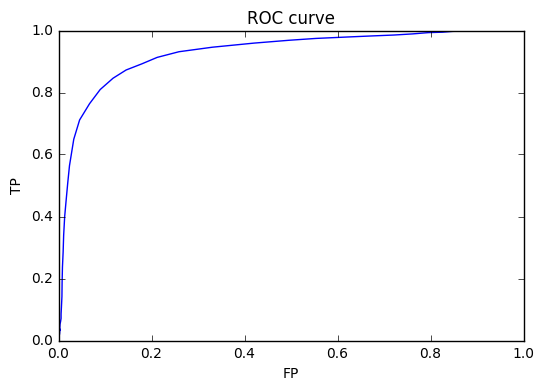

In [21]:
#dataset=['banana','diabetis','flare-solar','image','ringnorm']
#res = ['kernel','kernelparameter','regularization','cvloss','ypred']
bYY = bkrr.predict(bxte.T)
results['banana']['kernel']= bkrr.kernel[0]
results['banana']['kernelparameter'] = bkrr.kernelparameter
results['banana']['regularization'] = bkrr.regularization
results['banana']['cvloss'] = roc_fun(byte.T, bYY, plot = True)
results['banana']['ypred'] = bYY

with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [22]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.77109269],
         [-0.2448248 ],
         [-0.53843675],
         ..., 
         [ 1.04244162],
         [-0.60053262],
         [-0.16481672]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

## Banann polynomial

In [16]:
bkrrp = imp.cv(bxtr.T, bytr[0], imp.krr, params_pol ,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


polynomial
4
0.0001
0.137959183673
[[ 0.70939201]
 [-0.47118822]
 [-0.51649888]
 ..., 
 [ 1.5264112 ]
 [-0.70538808]
 [-0.18683148]]


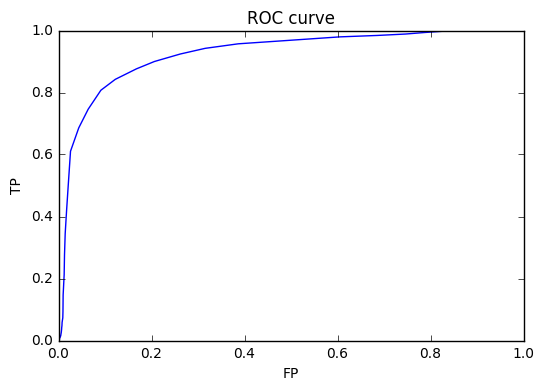

In [17]:
bYYp = bkrrp.predict(bxte.T)
print(bkrrp.kernel[0])
print(bkrrp.kernelparameter)
print(bkrrp.regularization)
print(roc_fun(byte.T, bYYp, plot = True))
print(bYYp)

## diabetis gaus

In [11]:
dkrrl = imp.cv(dxtr.T, dytr[0], imp.krr, params_lin,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
AUC =  0.846986417657
0.243333333333


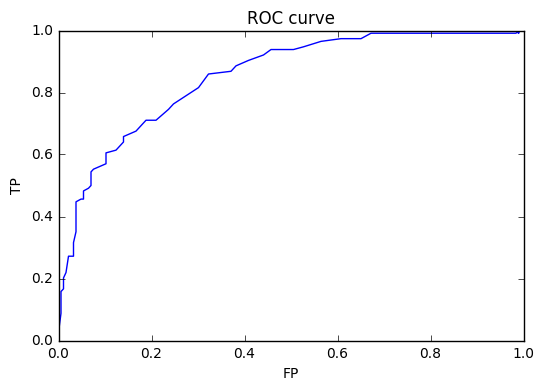

In [18]:
dYYl = dkrrl.predict(dxte.T)
print("The used kernel"dkrrl.kernel[0])
print(roc_fun(dyte.T, dYYl, plot = True))

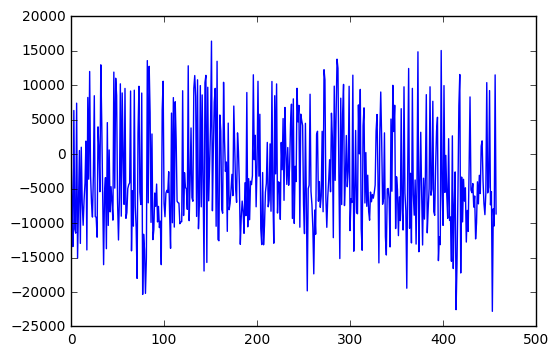

In [35]:
plt.plot(dkrrl.alpha)

In [18]:
dkrrg = imp.cv(dxtr.T, dytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


gaussian
4.64158883361
0.0001
0.363333333333
[[ -8.24566382e-01]
 [ -7.33547275e-01]
 [ -4.24668439e+00]
 [ -5.78414954e-01]
 [  2.35521399e-01]
 [ -7.69377730e-01]
 [  9.57451569e-02]
 [  2.02615069e-01]
 [  9.61459582e-01]
 [ -7.06968916e-01]
 [ -4.84663787e-02]
 [ -9.19409503e-01]
 [  5.32788510e+00]
 [ -6.32919463e-01]
 [ -1.20363224e+00]
 [  2.71517719e+00]
 [ -9.64277221e-01]
 [  7.87061744e-01]
 [ -1.27771029e+00]
 [ -3.52397552e-01]
 [ -1.04096430e+00]
 [ -1.01482277e+00]
 [ -1.14769845e+00]
 [ -8.10495992e-01]
 [ -1.01297023e+00]
 [ -1.30999529e+01]
 [ -1.13610998e+00]
 [ -7.60330693e-02]
 [ -8.23999304e-01]
 [  2.98249136e-02]
 [ -1.04489854e+00]
 [ -8.44242237e-01]
 [ -7.47692412e-01]
 [ -1.05193482e+00]
 [ -1.13605075e+00]
 [ -1.87908885e+00]
 [  2.56015020e-01]
 [  6.43761449e-01]
 [  3.34283347e+00]
 [ -3.39110972e-01]
 [  3.08208592e-01]
 [ -4.36252786e-01]
 [ -8.64870245e-01]
 [ -5.35642256e-01]
 [  2.16146551e-01]
 [  9.28905404e-02]
 [ -6.08732602e-01]
 [  5.88677238e

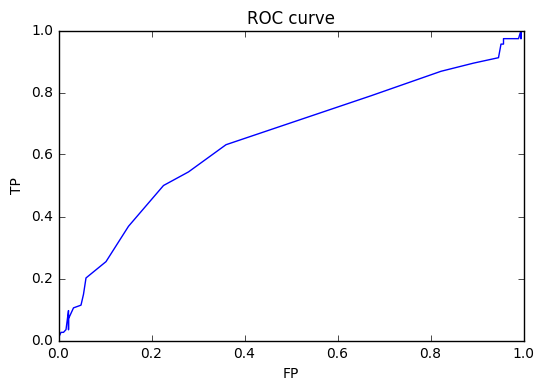

In [19]:
dYYg = dkrrg.predict(dxte.T)
print(dkrrg.kernel[0])
print(dkrrg.kernelparameter)
print(dkrrg.regularization)
print(roc_fun(dyte.T, dYYg, plot = True))
print(dYYg)

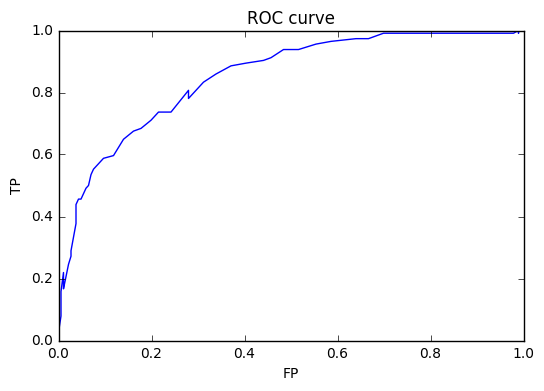

In [13]:
results['diabetis']['kernel']= dkrrl.kernel[0]
results['diabetis']['kernelparameter'] = dkrrl.kernelparameter
results['diabetis']['regularization'] = dkrrl.regularization
results['diabetis']['cvloss'] = roc_fun(dyte.T, dYYl, plot = True)
results['diabetis']['ypred'] = dYYl



In [14]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

In [15]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [16]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

## diabetis pol

In [20]:
dkrrp = imp.cv(dxtr.T, dytr[0], imp.krr, params_pol,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


polynomial
4
0.0001
0.376666666667
[[ -2.69051496e+01]
 [ -1.05154515e+01]
 [ -2.81400948e+02]
 [  1.33885992e+00]
 [  1.30016468e+01]
 [  1.02612360e+02]
 [  7.90011969e+01]
 [ -2.21916258e+00]
 [ -5.66217508e+00]
 [ -6.47098941e+00]
 [  1.59567300e+00]
 [  3.22805594e+00]
 [ -2.40073628e+01]
 [ -7.45778850e-01]
 [ -2.02204548e+00]
 [ -5.97547731e+01]
 [  4.17165817e+00]
 [  3.99386295e+01]
 [ -1.26654434e+00]
 [  1.05484328e+01]
 [  2.02433149e+00]
 [ -6.20716850e-01]
 [ -2.37079840e+00]
 [ -4.30844783e+00]
 [ -1.44202851e+01]
 [  1.61635404e+02]
 [ -5.15529662e+00]
 [ -4.55523796e+01]
 [ -1.26484985e+00]
 [  2.73494813e+00]
 [  2.07982155e-01]
 [  1.46742586e+01]
 [  3.06269348e+00]
 [ -8.74721396e+00]
 [  1.51919773e+00]
 [ -7.26075608e+00]
 [  2.92936117e+00]
 [  1.71236876e+01]
 [ -8.06928305e+01]
 [ -1.64176602e+00]
 [  2.03207664e-01]
 [  2.63644036e+00]
 [  7.34511146e+00]
 [ -2.35585462e+00]
 [  2.88189167e-01]
 [  3.55098270e+00]
 [  4.20331689e+01]
 [  2.55071245e+00]
 [  6

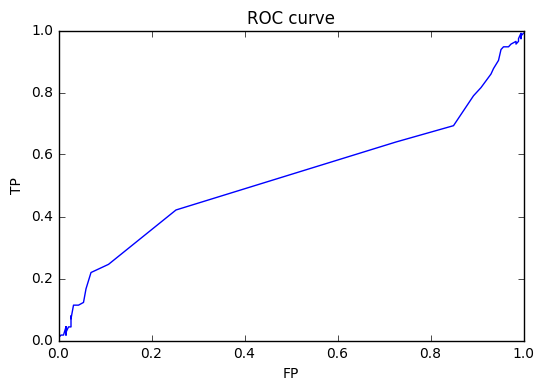

In [21]:
dYYp = dkrrp.predict(dxte.T)
print(dkrrp.kernel[0])
print(dkrrp.kernelparameter)
print(dkrrp.regularization)
print(roc_fun(dyte.T, dYYp, plot = True))
print(dYYp)

## flare-solar gaus

In [17]:
fkrrl = imp.cv(fxtr.T, fytr[0], imp.krr, params_lin,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
0.3075
[[-0.24184525]
 [-0.24184525]
 [-0.26401811]
 [ 0.79024768]
 [ 0.07613088]
 [ 0.07613088]
 [ 0.07613088]
 [-0.24184525]
 [ 1.21367729]
 [-0.24184525]
 [-0.24184525]
 [ 0.07613088]
 [-0.24184525]
 [-0.24184525]
 [ 1.04774648]
 [ 0.55812131]
 [ 0.09830373]
 [ 0.21875649]
 [ 1.37872671]
 [ 1.06991933]
 [-0.28619095]
 [ 0.05395803]
 [ 0.07613088]
 [-0.26401811]
 [-0.26401811]
 [-0.08333895]
 [ 0.13635726]
 [ 0.70759749]
 [ 0.43766854]
 [ 0.49789493]
 [ 0.15853011]
 [ 0.13635726]
 [ 0.4154957 ]
 [ 0.70759749]
 [-0.26401811]
 [-0.24184525]
 [-0.26401811]
 [-0.24184525]
 [ 0.09751956]
 [-0.24184525]
 [ 0.72977034]
 [ 0.47572208]
 [ 0.43766854]
 [-0.24184525]
 [-0.24184525]
 [-0.04661972]
 [-0.26401811]
 [-0.24184525]
 [ 0.4154957 ]
 [-0.24184525]
 [ 0.43766854]
 [ 1.17562376]
 [-0.24184525]
 [ 0.07613088]
 [-0.26401811]
 [ 0.31703642]
 [ 0.09830373]
 [-0.26401811]
 [ 0.27898288]
 [-0.24184525]
 [-0.18161887]
 [ 0.07613088]
 [-0.24184525]
 [-0.24184525]
 [-0.24184525]
 [

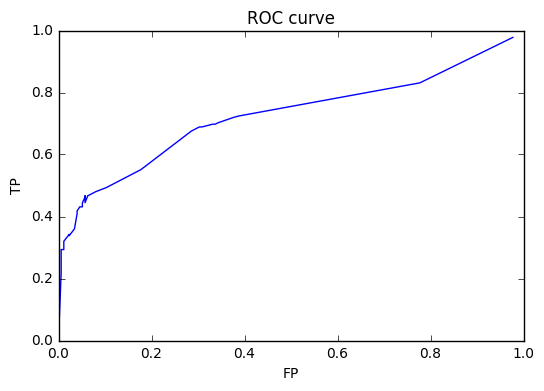

In [18]:
fYYl = fkrrl.predict(fxte.T)
print(fkrrl.kernel[0])
print(fkrrl.kernelparameter)
print(fkrrl.regularization)
print(roc_fun(fyte.T, fYYl, plot = True))
print(fYYl)

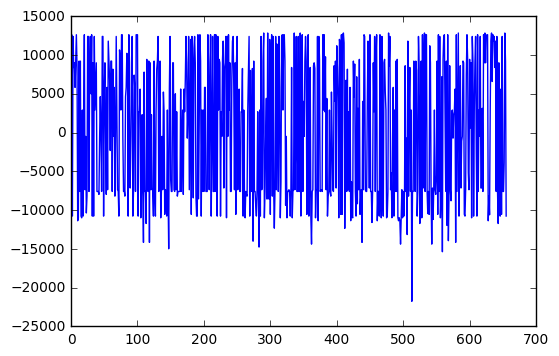

In [38]:
plt.plot(fkrrl.alpha)

In [26]:
fkrrg = imp.cv(fxtr.T, fytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


gaussian
4.64158883361
0.0001
0.3425
[[ -3.74435349e-01]
 [ -3.74435349e-01]
 [ -6.71726690e-02]
 [  1.45778683e+00]
 [ -1.21578966e-01]
 [ -1.21578966e-01]
 [ -1.21578966e-01]
 [ -3.74435349e-01]
 [  1.57300543e-01]
 [ -3.74435349e-01]
 [ -3.74435349e-01]
 [ -1.21578966e-01]
 [ -3.74435349e-01]
 [ -3.74435349e-01]
 [  9.74209377e-01]
 [  8.29848693e-01]
 [  1.57530246e-01]
 [  8.75517848e-01]
 [  8.51544429e-01]
 [  1.06391145e+00]
 [ -1.01476509e-01]
 [ -8.17979394e-02]
 [ -1.21578966e-01]
 [ -6.71726690e-02]
 [ -6.71726690e-02]
 [ -6.12054905e-01]
 [  1.25588408e-01]
 [  1.02516383e+00]
 [  5.29537638e-01]
 [  5.30215610e-01]
 [  5.13266740e-01]
 [  1.25588408e-01]
 [  4.00069834e-01]
 [  1.02516383e+00]
 [ -6.71726690e-02]
 [ -3.74435349e-01]
 [ -6.71726690e-02]
 [ -3.74435349e-01]
 [ -4.80128888e-02]
 [ -3.74435349e-01]
 [  9.65492500e-01]
 [  3.83714171e-01]
 [  5.29537638e-01]
 [ -3.74435349e-01]
 [ -3.74435349e-01]
 [ -1.85693217e-01]
 [ -6.71726690e-02]
 [ -3.74435349e-01]
 [ 

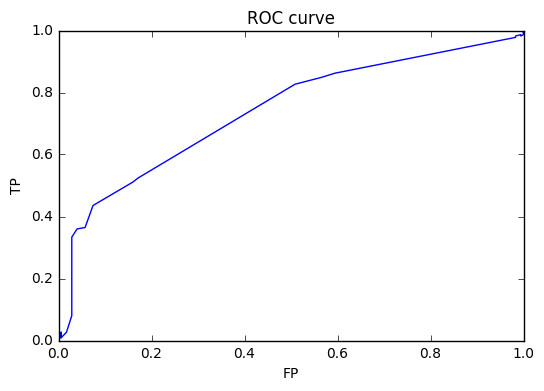

In [27]:
fYYg = fkrrg.predict(fxte.T)
print(fkrrg.kernel[0])
print(fkrrg.kernelparameter)
print(fkrrg.regularization)
print(roc_fun(fyte.T, fYYg, plot = True))
print(fYYg)

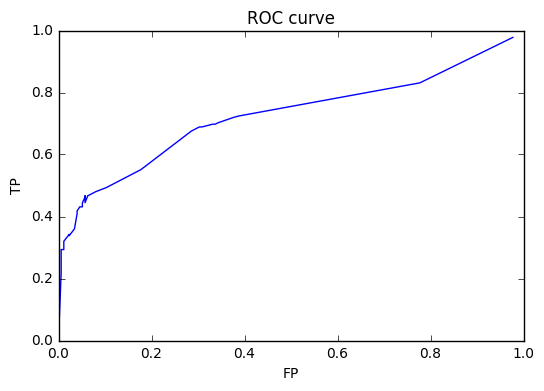

In [20]:
results['flare-solar']['kernel']= fkrrl.kernel[0]
results['flare-solar']['kernelparameter'] = fkrrl.kernelparameter
results['flare-solar']['regularization'] = fkrrl.regularization
results['flare-solar']['cvloss'] = roc_fun(fyte.T, fYYl, plot = True)
results['flare-solar']['ypred'] = fYYl

In [21]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [22]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

In [48]:
fkrrp = imp.cv(fxtr.T, fytr[0], imp.krr, params_pol,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI


LinAlgError: Singular matrix

In [ ]:
fYYp = fkrrp.predict(fxte.T)
print(fkrrp.kernel[0])
print(fkrrp.kernelparameter)
print(fkrrp.regularization)
print(roc_fun(fyte.T, fYYp, plot = True))
print(fYYp)

## image-gau

In [23]:
ikrrl = imp.cv(ixtr.T, iytr[0], imp.krr, params_lin,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
0.179207920792
[[ 0.68771487]
 [-0.6650025 ]
 [ 0.25757335]
 ..., 
 [-0.53029856]
 [-0.05421134]
 [ 0.06081382]]


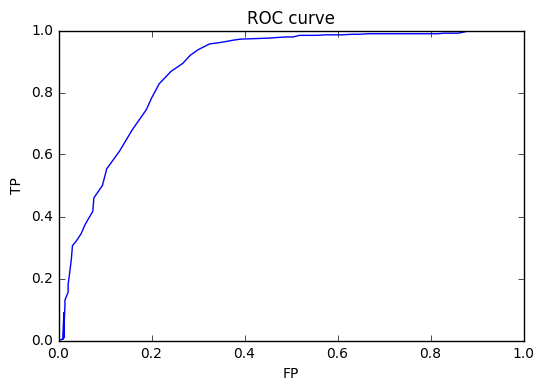

In [24]:
iYYl = ikrrl.predict(ixte.T)
print(ikrrl.kernel[0])
print(ikrrl.kernelparameter)
print(ikrrl.regularization)
print(roc_fun(iyte.T, iYYl, plot = True))
print(iYYl)

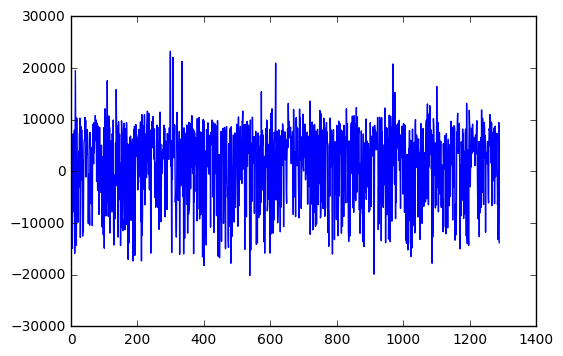

In [39]:
plt.plot(ikrrl.alpha)

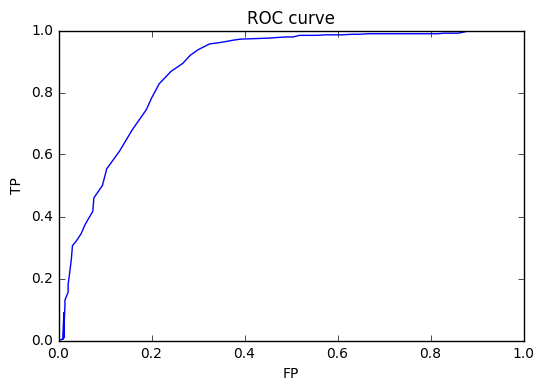

In [25]:
results['image']['kernel']= ikrrl.kernel[0]
results['image']['kernelparameter'] = ikrrl.kernelparameter
results['image']['regularization'] = ikrrl.regularization
results['image']['cvloss'] = roc_fun(iyte.T, iYYl, plot = True)
results['image']['ypred'] = iYYl

In [26]:
with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [27]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

In [ ]:
ikrrg = imp.cv(ixtr.T, iytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


In [ ]:
iYYg = ikrrg.predict(fxte.T)
print(ikrrg.kernel[0])
print(ikrrg.kernelparameter)
print(ikrrg.regularization)
print(roc_fun(iyte.T, iYYg, plot = True))
print(iYYg)

## ringnorm

In [28]:
rkrrl = imp.cv(rxtr.T, rytr[0], imp.krr, params_lin,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


linear
0
0.0001
0.243571428571
[[-0.26620809]
 [-0.55446703]
 [-0.29458036]
 ..., 
 [-0.2445433 ]
 [-0.14951235]
 [-0.03140741]]


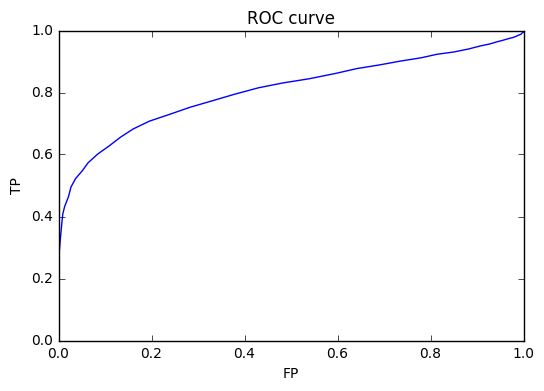

In [29]:
rYYl = rkrrl.predict(rxte.T)
print(rkrrl.kernel[0])
print(rkrrl.kernelparameter)
print(rkrrl.regularization)
print(roc_fun(ryte.T, rYYl, plot = True))
print(rYYl)

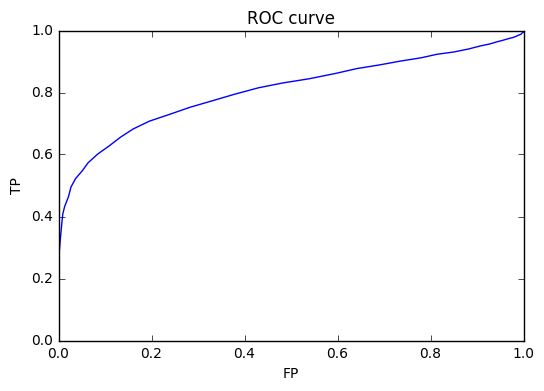

In [46]:
results['ringnorm']['kernel']= rkrrl.kernel[0]
results['ringnorm']['kernelparameter'] = rkrrl.kernelparameter
results['ringnorm']['regularization'] = rkrrl.regularization
results['ringnorm']['cvloss'] = roc_fun(ryte.T, rYYl, plot = True)
results['ringnorm']['ypred'] = rYYl

with open('results.p', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('results.p', 'rb') as handle:
    results = pickle.load(handle)

In [47]:
results

{'banana': {'cvloss': 0.13734693877551021,
  'kernel': 'gaussian',
  'kernelparameter': 4.6415888336127775,
  'regularization': 0.0001,
  'ypred': array([[ 0.74365347],
         [-0.23530607],
         [-0.58487961],
         ..., 
         [ 1.40002271],
         [-0.57515849],
         [-0.21547057]])},
 'diabetis': {'cvloss': 0.24666666666666667,
  'kernel': 'linear',
  'kernelparameter': 0,
  'regularization': 0.0001,
  'ypred': array([[ 0.2926619 ],
         [ 0.06084429],
         [ 0.8399555 ],
         [-0.01107809],
         [ 0.19175391],
         [-0.92370009],
         [ 0.88739582],
         [-0.0806396 ],
         [ 0.42958591],
         [-0.63290678],
         [ 0.3600093 ],
         [-0.23349174],
         [-0.12997344],
         [-0.23203149],
         [-0.75779858],
         [ 0.65666541],
         [-0.55438049],
         [ 0.97785814],
         [-0.91952667],
         [-0.00263976],
         [-0.24478525],
         [-0.11332357],
         [ 0.10151693],
         [-0.

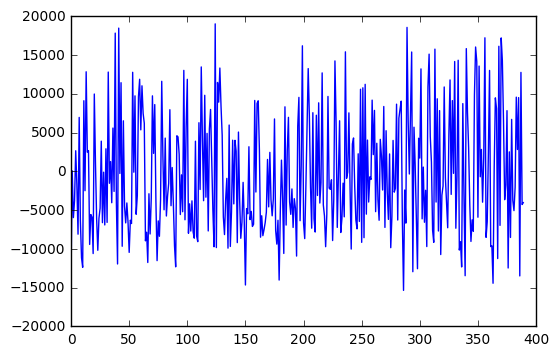

In [40]:
plt.plot(rkrrl.alpha)

In [31]:
rkrrg = imp.cv(rxtr.T, rytr[0], imp.krr, params_gaus,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


gaussian
0.01
0.0001
0.495857142857
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


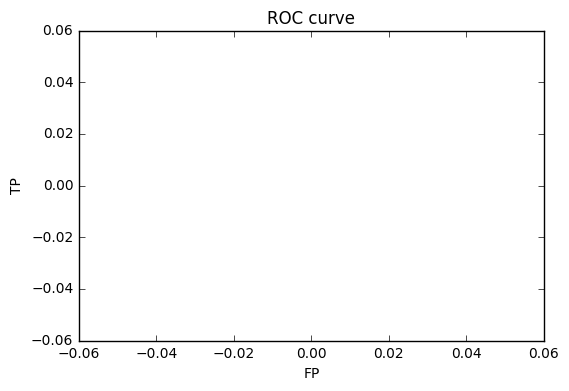

In [32]:
rYYg = rkrrg.predict(rxte.T)
print(rkrrg.kernel[0])
print(rkrrg.kernelparameter)
print(rkrrg.regularization)
print(roc_fun(ryte.T, rYYg, plot = True))
print(rYYg)

In [44]:
rkrrp = imp.cv(rxtr.T, rytr[0], imp.krr, params_pol,loss_function=roc_fun)

/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:103: RuntimeWarning: divide by zero encountered in true_divide
  LCI_inv=1/LCI
/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


/home/ubthiro/Dokumente/WirtsInf/ML_Lab_Course

/Ubung/03/sheet3.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(Y==None):


polynomial
2
0.0001
0.495857142857
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


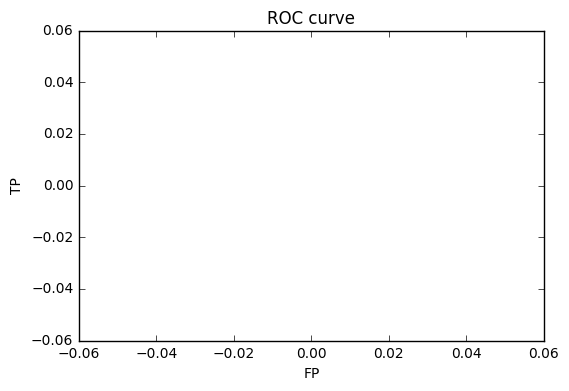

In [45]:
rYYp = rkrrg.predict(rxte.T)
print(rkrrp.kernel[0])
print(rkrrp.kernelparameter)
print(rkrrp.regularization)
print(roc_fun(ryte.T, rYYp, plot = True))
print(rYYp)

In [150]:
KCI_inv=np.linalg.solve(KKK+0.0000001*I,I)

In [158]:
S=np.dot(KCI_inv.transpose(0,2,1),KK.T).transpose(0,2,1)
print((np.dot(S,np.ones((5,1)))-(np.ones(5).reshape(5,1)*br)).shape)

(10, 5, 1)


In [170]:
(np.ones(5).reshape(5,1)*br)
err = np.dot(I*S,np.ones((5,1))).mean(1)
np.argmin(err[:,0])

0

In [133]:
tre = np.array(([np.array([[1,2],[3,4]])*3],[np.array([[1,2],[3,4]])*2],[np.array([[1,2],[3,4]])]))
tre=tre.reshape(3,2,2)
np.dot(tre.transpose(0,2,1),np.ones((2,2))).transpose(0,2,1)

array([[[ 12.,  18.],
        [ 12.,  18.]],

       [[  8.,  12.],
        [  8.,  12.]],

       [[  4.,   6.],
        [  4.,   6.]]])

In [134]:
tre

array([[[ 3,  6],
        [ 9, 12]],

       [[ 2,  4],
        [ 6,  8]],

       [[ 1,  2],
        [ 3,  4]]])

In [43]:
n = 30
bins =100
m=0
k=1
thres = np.linspace(m,k,bins).reshape(bins,1)*np.ones((1 ,n))
dt = np.random.rand(1,n)*np.ones((bins ,1))

In [44]:
thres 

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01010101,  0.01010101,  0.01010101, ...,  0.01010101,
         0.01010101,  0.01010101],
       [ 0.02020202,  0.02020202,  0.02020202, ...,  0.02020202,
         0.02020202,  0.02020202],
       ..., 
       [ 0.97979798,  0.97979798,  0.97979798, ...,  0.97979798,
         0.97979798,  0.97979798],
       [ 0.98989899,  0.98989899,  0.98989899, ...,  0.98989899,
         0.98989899,  0.98989899],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [45]:
print(dt.shape)
dt

(100, 30)


array([[ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       ..., 
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756],
       [ 0.38149921,  0.20358727,  0.55023084, ...,  0.67838531,
         0.10459124,  0.23955756]])

In [48]:
(dt>thres).astype(np.int64) = n

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [133]:
prebl =np.array([[1,0,1],[1,1,0],[1,1,1]]) 
prebl

array([[1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [134]:
comp=(np.array([[1,0,1],[1,1,0],[1,1,1]]) == np.array([0,1,1])).astype(np.int64)
comp

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [135]:
comp-prebl

array([[-1,  0,  0],
       [-1,  0,  0],
       [-1,  0,  0]])

In [67]:
ps =  np.array([0,1,1]).sum()
tpn = (prebl*comp).sum(1)
tpr = tpn/ps
tpr

array([ 0.5,  0.5,  1. ])

In [69]:
fpn = -(comp-prebl).sum(1)
fpr = fpn

array([1, 1, 1])

In [70]:
np.array([[0],[1]])

array([[0],
       [1]])

In [78]:
np.linalg.norm(comp[:2,:],axis=0)

array([ 0.,  1.,  1.])

In [85]:
np.append(np.arange(7).reshape(1,7),np.arange(7).reshape(1,7),0)

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6]])

In [15]:
np.diag(np.array([1,2,3]))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [59]:
def clf(kernel,b):
    return a,b
a = [[0,1],[2,3,4]]
combs1 = it.product(a)
combs2 = it.product(*a)
cs1 = list(combs1)
cs2 = list(combs2)
b = {'kernel': 'gaussian', 'p': 0.01}
cs2

[(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]

In [14]:
np.arange(10)[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(10)[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])